## Estruturação dos Dados


###  367 - Boas vindas
<h1>Data Wrangling</h1><h2>Tema central</h2><p>Preparação de dados (Data Preparation) para análise e modelagem.</p><h2>Tópicos abordados</h2><h3>Conceitos</h3><ul><li>Continuação do Data Cleaning</li><li>Focado em preparar os dados para análise e modelagem</li><li>Uma das etapas mais importantes</li></ul><h3>Transformações</h3><ul><li>Merge e Group By</li><li>Lidar com variáveis numéricas e categóricas</li></ul><h3>Enriquecimento dos dados</h3><ul><li>Feature Engineering</li><li>Adicionar/transformar variáveis para melhorar modelos</li></ul><h3>Pipeline</h3><ul><li>Encapsular processos em funções</li><li>Utilizar funções customizadas e do Scikit-Learn</li></ul>

###  368 - Estruturação dos Dados - Merge
<h1>Tema central: Data Wrangling</h1><h2>Bibliotecas utilizadas</h2><ul><li>NumPy</li><li>Pandas</li><li>Seaborn</li><li>Matplotlib</li><li>Plotly Express</li><li>Scikit-learn</li></ul><h2>Merge de tabelas</h2><ul><li>Similar ao Join do SQL</li><li>Tipos:<ul><li>Inner join (intersecção)</li><li>Left join (preserva tabela esquerda)</li><li>Right join (preserva tabela direita)</li><li>Outer join (união)</li></ul></li><li>Pode resultar em valores faltantes caso não haja correspondência</li></ul><h2>Exemplos</h2><ul><li>Tabelas df1 e df2 com colunas em comum (K1, K2, K3) e exclusivas</li><li>Inner join: intersecção das colunas em comum</li><li>Left join: preserva df1, valores faltantes em df2</li><li>Right join: preserva df2, valores faltantes em df1</li><li>Alter: união, valores faltantes quando não há correspondência</li></ul><h2>Interatividade</h2><ul><li>Decorador interact para selecionar tipo de join</li><li>Modificar tabelas de entrada para compreender funcionamento</li></ul><p>O mapa mental resume os principais tópicos abordados sobre merge de tabelas no Pandas, trazendo o tema central, bibliotecas utilizadas, comparação com SQL, tipos de join disponíveis e exemplos práticos para melhor compreensão do conceito.</p>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [ ]:
# Configurar layout padrão das figuras
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [ ]:
# Função para plotar lado a lado
def display_side_by_side(dataframes:list,titles:list):
  html_str=''
  for df,title in zip(dataframes, titles):
    html_str+=f'<span>{title}:</span>'
    html_str+=df.to_html().replace('table','table style="display:inline"')
    html_str+="%nbsp"*10
  display(HTML(html_str))

In [ ]:
df1 = pd.DataFrame(
    {
        "key": ["K0","K1","K2","K3"],
        "A": ["A0","A1","A2","A3"],
        "B": ["B0","B1","B2","B3"],
    }, index=range(4)
)
df2 = pd.DataFrame(
    {
        "key": ["K1","K2","K3","K4"],
        "C": ["C1","C2","C3","C4"],
        "D": ["D1","D2","D3","D4"],
    }, index=range(1,5)
)

In [ ]:
display_side_by_side([df1,df2], ['df1','df2'])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
,key,C,D
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4


In [ ]:
# Mostrar merge
df1.merge(df2, on='key',how='inner')

,key,A,B,C,D
0,K1,A1,B1,C1,D1
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
# Mostrar todos
df_inner=df1.merge(df2, on='key',how='inner')
df_left=df1.merge(df2, on='key',how='left')
df_right=df1.merge(df2, on='key',how='right')

display_side_by_side(
    [df1,df2,df_inner,df_left,df_right],
    ['df1','df2','inner','left_join','right_join']
)

In [ ]:
# Função merge
def merge(df1,df2, method='inner'):
  df_merge = df1.merge(df2, how=method)
  display_side_by_side(
      [df1,df2,df_merge],
      ['df1','df2',f'{method}_join']
  )
merge(df1,df2,method='right')

In [ ]:
@interact(method=['inner','left', 'right','outer'])
def merge(method):
  df_merge = df1.merge(df2, how=method)
  display_side_by_side(
      [df1,df2,df_merge],
      ['df1','df2',f'{method}_join']
  )


interactive(children=(Dropdown(description='method', options=('inner', 'left', 'right', 'outer'), value='inner…

###  369 - Estruturação dos Dados - Concat e Join
<h1>Técnicas para unir dataframes no Pandas</h1><h2>CONCAT</h2><ul><li>Funciona como o UNION do SQL</li><li>Faz concatenação vertical (uma tabela embaixo da outra)</li><li>Também faz concatenação horizontal (tabelas lado a lado)</li></ul><h3>Concatenação vertical</h3><ul><li>Usa a função <code>pd.concat()</code></li><li>Passando uma lista de dataframes</li><li>Os dataframes devem ter as mesmas colunas</li></ul><h3>Concatenação horizontal</h3><ul><li>Usa <code>pd.concat()</code> com <code>axis=1</code></li><li>Une os dataframes coluna a coluna</li><li>Pode dar erro se os índices forem diferentes</li><li>Solução: resetar o índice antes de concatenar</li></ul><h2>JOIN</h2><ul><li>Funciona como o MERGE do SQL</li><li>Une pelos índices ao invés das colunas</li><li>Por padrão faz LEFT JOIN</li><li>Para INNER JOIN, usar <code>how='inner'</code></li></ul><h2>Observações</h2><ul><li>Antes de concatenar, verificar se as colunas têm o mesmo significado</li><li>Renomear colunas se necessário</li><li>Prestar atenção em colunas com sufixo _x e _y após o merge</li></ul>

In [ ]:
# Separando exemplo de data_frame
df_A=df1.iloc[:2]
df_B=df1.iloc[-2:]

display_side_by_side([df_A,df_B], ['df_A','df_B'])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
,key,A,B
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# Concatenando verticalmente
pd.concat([df_A,df_B])

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# Concatenando horizontalmente
pd.concat([df_A,df_B], axis=1)

,key,A,B,key,A,B
0,K0,A0,B0,NaN,NaN,NaN
1,K1,A1,B1,NaN,NaN,NaN
2,NaN,NaN,NaN,K2,A2,B2
3,NaN,NaN,NaN,K3,A3,B3


In [ ]:
# Concantenando horizontalmente, forçando mesmo index
pd.concat([df_A,df_B.reset_index(drop=True)], axis=1)

,key,A,B,key,A,B
0,K0,A0,B0,K2,A2,B2
1,K1,A1,B1,K3,A3,B3


In [ ]:
# Join
df_left = pd.DataFrame({
  'A':['A0', 'A1', 'A2'],
  'B':['B0', 'B1', 'B2'],
  }, index=['K0', 'K1', 'K2'])

df_right = pd.DataFrame({
  'C':['C0', 'C2', 'C3'],
  'D':['D0', 'D2', 'D3'],
  }, index=['K0', 'K2', 'K3'])

df_join=df_left.join(df_right, how='inner')
display_side_by_side([df_left,df_right,df_join], ['df_left', 'df_right','df_join'])


###  370 - Estruturação dos Dados Group by (Parte 1)
<h1>Tema Central: GroupBy no Pandas</h1><h2>Split, Apply e Combine</h2><ul><li>Divide o DataFrame em grupos menores (split)</li><li>Aplica funções nesses grupos (apply)<ul><li>Funções de agregação (sum, mean, etc)</li><li>Funções de transformação (padronização, filtragem)</li><li>Funções customizadas</li></ul></li><li>Combina os grupos transformados de volta em um DataFrame (combine)</li></ul><h2>Prática</h2><ul><li>Agrupando por uma ou mais colunas categóricas</li><li>Aplicando funções agregadas (mean, max, etc)</li><li>Aplicando múltiplas funções de agregação</li><li>Usando funções Lambda customizadas</li><li>Criando funções mais complexas para aplicar</li><li>Exemplo:<ul><li>Calcula média da gorjeta como % da conta total</li><li>Mostra que mulheres contribuem em média mais proporcionalmente</li></ul></li></ul><p>O resumo cobre os principais tópicos do vídeo, explicando o conceito de GroupBy e trazendo exemplos práticos de uso. Os markdowns de títulos e marcadores ajudam a organizar visualmente as seções.</p>

In [ ]:
# Carregando pelo Seaborn
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
## -- Agregação -- ##

In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em todas as colunas (passível de aplicação da função)
df.groupby('sex').mean(numeric_only=True)

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.Series
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [ ]:
# Podemos agrupar por uma coluna e aplicar uma função em um coluna-alvo retornando um pandas.DataFrame (duplo"[[")
df.groupby('sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


In [ ]:
# Podemos agrupar por múltiplas colunas
df.groupby(['time','day'])[['total_bill','tip']].mean()

total_bill       tip
time   day                       
Lunch  Thur   17.664754  2.767705
       Fri    12.845714  2.382857
       Sat          NaN       NaN
       Sun          NaN       NaN
Dinner Thur   18.780000  3.000000
       Fri    19.663333  2.940000
       Sat    20.441379  2.993103
       Sun    21.410000  3.255132

In [ ]:
# Podemos aplicar múltiplas funções de agregação suportadas pelo pandas
df.groupby('smoker')[['tip']].agg(['min', 'max', 'mean','std'])

tip                          
        min   max      mean       std
smoker                               
Yes     1.0  10.0  3.008710  1.401468
No      1.0   9.0  2.991854  1.377190

In [ ]:
# Podemos aplicar funções customizadas simples
df.groupby('smoker')[['tip']].agg(['min', 'max', 'mean','std', lambda x: x.mean()+10])

tip                                     
        min   max      mean       std <lambda_0>
smoker                                          
Yes     1.0  10.0  3.008710  1.401468  13.008710
No      1.0   9.0  2.991854  1.377190  12.991854

In [ ]:
# Podemos aplicar funções customizadas mais complexas (simples)
def mean_diff(subdf):
  return np.mean(values) + 10

df.groupby('smoker')[['tip']].agg(['min', 'max', 'mean','std', mean_plus_10])

tip                                       
        min   max      mean       std mean_plus_10
smoker                                            
Yes     1.0  10.0  3.008710  1.401468    13.008710
No      1.0   9.0  2.991854  1.377190    12.991854

In [ ]:
# Podemos aplicar funções customizadas mais complexas
def mean_diff(subdf):
  return np.mean(subdf['tip'] / subdf['total_bill'])

df_mean_diff = df.groupby('sex').apply(mean_diff)
df_tip_mean = df.groupby('sex').tip.mean()

In [ ]:
df_mean_diff

sex
Male      0.157651
Female    0.166491
dtype: float64

In [ ]:
df_tip_mean

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

###  371 - Estruturação dos Dados Group by (Parte 2)
<h1>Tema central: Group By no Pandas</h1><h2>Transformação</h2><ul><li>Mantém a mesma quantidade de linhas da tabela original</li><li>Mantém a mesma granularidade dos dados</li><li>Pode inserir o resultado como uma nova coluna no dataframe</li></ul><h2>Aplicações</h2><ul><li>Padronização por grupos (ex: sexo)</li><li>Média móvel por grupos para eliminar ruído</li><li>Preparar dados para modelagem (ex: agregar vendas diárias em vendas mensais)</li></ul><h2>Funcionalidades</h2><ul><li>Retorna um objeto DataFrameGroupBy<ul><li>Permite aplicar funções como sum(), mean() por grupos</li><li>Permite acessar grupos específicos</li><li>Permite ver a quantidade de grupos</li><li>Permite análises e explorações customizadas</li></ul></li></ul><h2>Agregações visuais</h2><ul><li>Bibliotecas como Seaborn já fazem agregações nos bastidores (ex: soma por grupos)</li><li>Mas às vezes precisamos das agregações explicitamente antes da visualização</li></ul>

In [ ]:
## Transformação
# Padronização por grupo
df.groupby('sex')[['tip']].transform(scale)

,tip
0,-1.581740
1,-0.963126
2,0.276472
3,0.148470
4,0.673616
...,...
239,1.906813
240,-0.722970
241,-0.734070
242,-0.902493


In [ ]:
# Rolling mean
df.groupby('sex')[['tip']].rolling(3).mean()

tip
sex                 
Male   1         NaN
       2         NaN
       3    2.823333
       5    3.840000
       6    3.340000
...              ...
Female 226  2.500000
       229  2.460000
       238  3.183333
       240  3.183333
       243  3.223333

[244 rows x 1 columns]

In [ ]:
# Groupby
print(df.groupby(['sex','smoker']).tip.sum())

sex     smoker
Male    Yes       183.07
        No        302.00
Female  Yes        96.74
        No        149.77
Name: tip, dtype: float64


<ipython-input-10-7d5c1341ed73>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='sex', y='tip', hue='smoker', estimator=np.sum, ci=False)


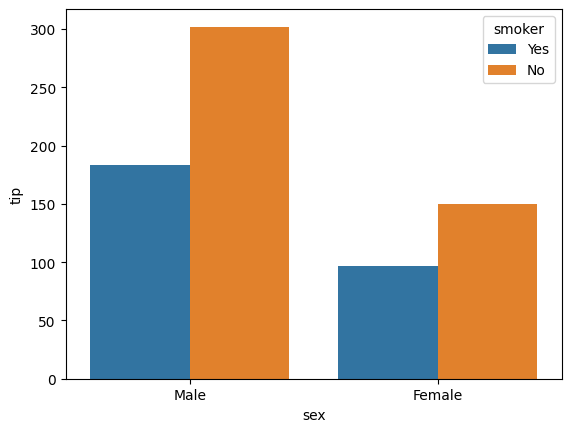

In [ ]:
# Seaborn barplot
# Anular o intervalo de confidência ci=False
sns.barplot(data=df, x='sex', y='tip', hue='smoker', estimator=np.sum, ci=False)
plt.show()

In [ ]:
# Ploty barplot
# Separar em grupo barmode
px.bar(data_frame=df, x='sex', y='tip', color='smoker',barmode='group')

In [ ]:
groups=df.groupby(['sex', 'smoker'])

In [ ]:
groups.get_group(('Female','Yes'))

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


In [ ]:
groups.groups

{('Female', 'No'): [0, 4, 11, 14, 16, 18, 21, 22, 29, 32, 33, 37, 51, 52, 57, 66, 71, 74, 82, 85, 94, 104, 111, 114, 115, 117, 118, 119, 121, 124, 125, 127, 128, 131, 132, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146, 147, 155, 157, 158, 162, 223, 238, 243], ('Female', 'Yes'): [67, 72, 73, 92, 93, 100, 101, 102, 103, 109, 164, 168, 169, 178, 186, 188, 191, 197, 198, 201, 202, 203, 205, 209, 213, 214, 215, 219, 221, 225, 226, 229, 240], ('Male', 'No'): [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 59, 64, 65, 68, 70, 75, 77, 78, 79, 81, 84, 86, 87, 88, 89, 91, 99, 108, 110, 112, 113, 116, 120, 122, 123, 126, 129, 130, 141, 142, 148, 149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 163, 165, 166, 167, 185, 195, 212, 227, 228, 232, 233, 235, 239, 242], ('Male', 'Yes'): [56, 58, 60, 61, 62, 63, 69, 76, 80, 83, 90, 95, 96, 97, 98, 105, 106, 107, 138, 170, 171, 172, 17

In [ ]:
groups.ngroups

4

###  372 - Estruturação dos Dados Pivot Table
<h1>Pivot Tables</h1><h2>O que são</h2><ul><li>Tipo especial de GroupBy</li><li>Deixa os dados estruturados em linhas e colunas</li><li>Cada célula é uma métrica de agregação</li></ul><h2>Principais argumentos</h2><ul><li>values: valores usados no cálculo das métricas</li><li>index: linhas</li><li>columns: colunas</li><li>aggfunc: função de agregação (média, soma etc)</li></ul><h2>Funcionalidades</h2><ul><li>Pode usar funções padrão ou customizadas</li><li>Aceita lista ou dicionário para aggfunc</li><li>Gera tabelas no formato &quot;wide&quot; (menos linhas)</li><li>Função &quot;melt&quot; transforma em formato &quot;long&quot; (mais linhas)</li><li>Facilita plotagem com cores por categoria</li></ul><h2>Comparação com GroupBy</h2><ul><li>Mesmas métricas de agregação</li><li>Apenas formatação diferente dos dados</li><li>GroupBy deixa dados em formato long</li><li>Pivot Table deixa em formato wide</li></ul><p>Em resumo, o Pivot Table nada mais é que um GroupBy especial, que formata a saída em linhas e colunas baseado em categorias. Ele facilita a análise exploratória, plotagem e visualização dos dados agregados.</p>

In [ ]:
# Primeiras linhas
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Exemplo de pivot: sex - time - tip
df.pivot_table(index='sex', columns='day', values='tip')

day,Thur,Fri,Sat,Sun
sex,,,,
Male,2.980333,2.693000,3.083898,3.220345
Female,2.575625,2.781111,2.801786,3.367222


In [ ]:
# Exemplo de group by para comparação
df.groupby(['sex', 'day'])[['tip']].mean()

tip
sex    day           
Male   Thur  2.980333
       Fri   2.693000
       Sat   3.083898
       Sun   3.220345
Female Thur  2.575625
       Fri   2.781111
       Sat   2.801786
       Sun   3.367222

In [ ]:
# Exemplo de pivot: sex - time - total_bill/tip
df.pivot_table(index='sex', columns='time',values=['total_bill','tip'], aggfunc='sum')

tip         total_bill         
time    Lunch  Dinner      Lunch   Dinner
sex                                      
Male    95.11  389.96     595.60  2661.22
Female  90.40  156.11     571.87   999.08

In [ ]:
df.pivot_table(index='sex', columns=['time','day'],values=['total_bill','tip'], aggfunc=np.median)

tip                                 total_bill                       \
time   Lunch       Dinner                         Lunch        Dinner          
day     Thur   Fri   Thur  Fri    Sat    Sun       Thur    Fri   Thur    Fri   
sex                                                                            
Male    2.53  1.92    NaN  3.0  3.000  3.085     16.975  12.16    NaN  22.49   
Female  2.00  2.75    3.0  3.0  2.625  3.500     13.420  14.70  18.78  15.38   

                       
time                   
day       Sat     Sun  
sex                    
Male    18.24  20.725  
Female  18.36  17.410

In [ ]:
# Exemplo com group by para comparação
df.groupby(['sex','time', 'day'])[['total_bill','tip']].median()

total_bill    tip
sex    time   day                    
Male   Lunch  Thur      16.975  2.530
              Fri       12.160  1.920
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur         NaN    NaN
              Fri       22.490  3.000
              Sat       18.240  3.000
              Sun       20.725  3.085
Female Lunch  Thur      13.420  2.000
              Fri       14.700  2.750
              Sat          NaN    NaN
              Sun          NaN    NaN
       Dinner Thur      18.780  3.000
              Fri       15.380  3.000
              Sat       18.360  2.625
              Sun       17.410  3.500

In [ ]:
# Exemplo de pivot com múltiplas funções de agregação
df.pivot_table(index='sex', columns='time', values='tip', aggfunc=['mean', np.median, np.std, lambda x: x.sum()])

mean           median              std           <lambda>        
time       Lunch    Dinner  Lunch Dinner     Lunch    Dinner    Lunch  Dinner
sex                                                                          
Male    2.882121  3.144839   2.31    3.0  1.329017  1.529116    95.11  389.96
Female  2.582857  3.002115   2.01    3.0  1.075108  1.193483    90.40  156.11

In [ ]:
# Exemplo de pivot especificando funções em dicionário
agg_dict={'tip': 'mean', 'total_bill':[np.median,'min']}
df.pivot_table(index='sex', columns='time', aggfunc=agg_dict)

tip           total_bill                    
            mean               median          min       
time       Lunch    Dinner      Lunch Dinner Lunch Dinner
sex                                                      
Male    2.882121  3.144839      16.58  19.63  7.51   7.25
Female  2.582857  3.002115      13.42  17.19  8.35   3.07

In [ ]:
# Tabelas no formato long e wide
# Selecionando as colunas day,time e tip, a tabela pode ser considerada long
# Usando pivot_table, a tabela ficaria no formato wide
df_pivot = df.pivot_table(index='day', columns='time', values='tip').reset_index()
df_pivot

time,day,Lunch,Dinner
0,Thur,2.767705,3.000000
1,Fri,2.382857,2.940000
2,Sat,NaN,2.993103
3,Sun,NaN,3.255132


In [ ]:
# Para transformar em long novamente utilizamos a função 'melt'
df_pivot.melt(id_vars='day')

,day,time,value
0,Thur,Lunch,2.767705
1,Fri,Lunch,2.382857
2,Sat,Lunch,NaN
3,Sun,Lunch,NaN
4,Thur,Dinner,3.000000
5,Fri,Dinner,2.940000
6,Sat,Dinner,2.993103
7,Sun,Dinner,3.255132


In [ ]:
df_pivot.melt(id_vars='day') \
.plot.bar(backend='plotly', x='day',y='value',color='time', barmode='group')